In [2]:
# load functions in python file with magic command
%run ../code/final-active-functions.py

In [3]:
# load data
import pandas as pd
male = pd.read_csv('../data/petter/male_features.csv')
female = pd.read_csv('../data/petter/female_features.csv')

In [4]:
# append male and female datasets into new df
both = pd.concat([male, female])

In [5]:
# split each dataset into train and test sets
X_train_both, y_train_both, X_test_both, y_test_both = split_data_active(both, random_state=5, deleteXy=True)
X_train_male, y_train_male, X_test_male, y_test_male = split_data_active(male, random_state=5, deleteXy=True)
X_train_female, y_train_female, X_test_female, y_test_female = split_data_active(female, random_state=5, deleteXy=True)

In [6]:
# print info
print("Both dataset:")
print(f"Train set: {X_train_both.shape[0]} samples")
print(f"Test set: {X_test_both.shape[0]} samples")
print("\nMale dataset:")
print(f"Train set: {X_train_male.shape[0]} samples")
print(f"Test set: {X_test_male.shape[0]} samples")
print("\nFemale dataset:")
print(f"Train set: {X_train_female.shape[0]} samples")
print(f"Test set: {X_test_female.shape[0]} samples")

Both dataset:
Train set: 330 samples
Test set: 83 samples

Male dataset:
Train set: 145 samples
Test set: 37 samples

Female dataset:
Train set: 184 samples
Test set: 47 samples


## Model

* Single run of several models for each `both`, `female` and `male` datasets
* No model tuning
* Basic comparison

**Observation** is that when splitting into `train` and `test` sets, there is no guarantee that a person's rows (in this case, date+person) are not split between the two sets.  That is, people are not maintained across the datasets. 

**Predicting depression state of a person's day (row level) does not make sense, in my view.  We are interested in predicting a person's depression state - not whether a person's day is depresseed.** 


In [7]:
# list of models
# zeroR is loaded from functions file
# libraries loaded from function file
models = [
    ('ZeroR', ZeroRClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Linear SVC', LinearSVC(dual=False, max_iter=10000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier(verbose=-1)),
    ('AdaBoost', AdaBoostClassifier(algorithm='SAMME')),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('Gradient Boosting', GradientBoostingClassifier()), 
    ('SVM rbf', SVC(kernel='rbf')),
    ('SVM linear', SVC(kernel='linear')),
    ('Gaussian Process', GaussianProcessClassifier())
]

In [8]:
# empty dictionary to store results
all_results = {}

# single_run for each dataset
for dataset_name in ['both', 'male', 'female']:
    X_train = locals()[f"X_train_{dataset_name}"]
    X_test = locals()[f"X_test_{dataset_name}"]
    y_train = locals()[f"y_train_{dataset_name}"]
    y_test = locals()[f"y_test_{dataset_name}"]

    # single_run 
    results = single_run(X_train, X_test, y_train, y_test, models)

    # store the results in the all_results dictionary
    all_results[dataset_name] = results


c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Use

In [9]:
# print metrics (dataset, model, metric - can use 'all' for everything) - needs 'all_results' dictionary
print_model_metric(all_results, dataset = 'both', model = 'SVM rbf')
print("\n")
print_model_metric(all_results, dataset = 'male', model = 'SVM rbf', metric='all')
print("\n")
print_model_metric(all_results, dataset = 'female', model = 'SVM rbf')

both dataset elapsed_time for SVM rbf: 0.0019757747650146484
both dataset accuracy for SVM rbf: 0.6987951807228916
both dataset precision for SVM rbf: 0.6666666666666666
both dataset recall for SVM rbf: 0.5294117647058824
both dataset f1 for SVM rbf: 0.5901639344262295
both dataset specificity for SVM rbf: 0.8163265306122449
both dataset mcc for SVM rbf: 0.362918485045689
both dataset roc_auc for SVM rbf: 0.6728691476590636


male dataset elapsed_time for SVM rbf: 0.0010020732879638672
male dataset accuracy for SVM rbf: 0.7567567567567568
male dataset precision for SVM rbf: 0.7647058823529411
male dataset recall for SVM rbf: 0.7222222222222222
male dataset f1 for SVM rbf: 0.7428571428571429
male dataset specificity for SVM rbf: 0.7894736842105263
male dataset mcc for SVM rbf: 0.5131986876608863
male dataset roc_auc for SVM rbf: 0.7558479532163742


female dataset elapsed_time for SVM rbf: 0.0009946823120117188
female dataset accuracy for SVM rbf: 0.6595744680851063
female dataset preci

In [10]:
# print best results for each dataset
for dataset_name, dataset_results in all_results.items():
    for metric in ['accuracy', 'precision', 'f1', 'mcc']:
        print_top_models(dataset_name, dataset_results, metric)
    print_top3_fastest_model(dataset_name, dataset_results)
    print("\n")


Top 3 models for both dataset based on accuracy:
1. LightGBM: 0.8795180722891566
2. XGBoost: 0.8554216867469879
3. Gradient Boosting: 0.8433734939759037

Top 3 models for both dataset based on precision:
1. LightGBM: 0.8157894736842105
2. Gradient Boosting: 0.8
3. QDA: 0.7941176470588235

Top 3 models for both dataset based on f1:
1. LightGBM: 0.8611111111111112
2. XGBoost: 0.8333333333333334
3. Gradient Boosting: 0.8115942028985508

Top 3 models for both dataset based on mcc:
1. LightGBM: 0.7589507177349952
2. XGBoost: 0.7097759249387386
3. Gradient Boosting: 0.6778302010921357

Top 3 fastest models (elapsed time) for both dataset:
1. Naive Bayes: 0.0005359649658203125
2. QDA: 0.0010004043579101562
3. KNN: 0.0010020732879638672



Top 3 models for male dataset based on accuracy:
1. Random Forest: 0.9459459459459459
2. Decision Tree: 0.918918918918919
3. XGBoost: 0.918918918918919

Top 3 models for male dataset based on precision:
1. Random Forest: 0.9444444444444444
2. Decision Tree:

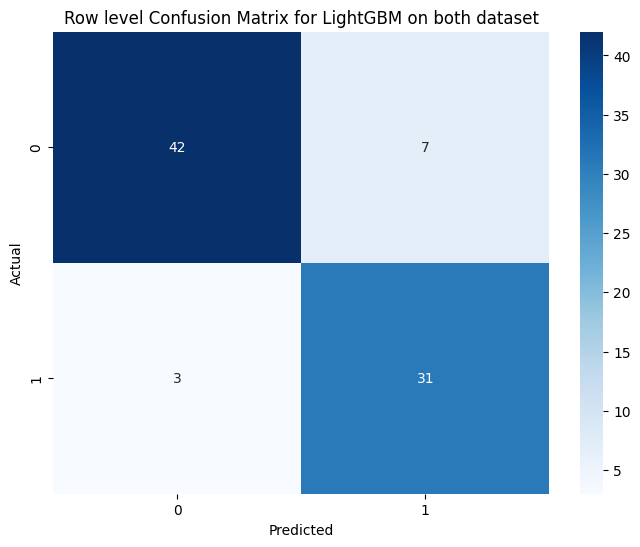

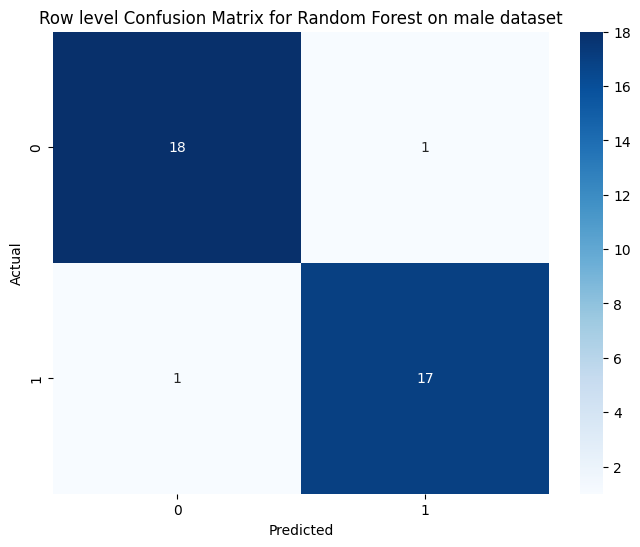

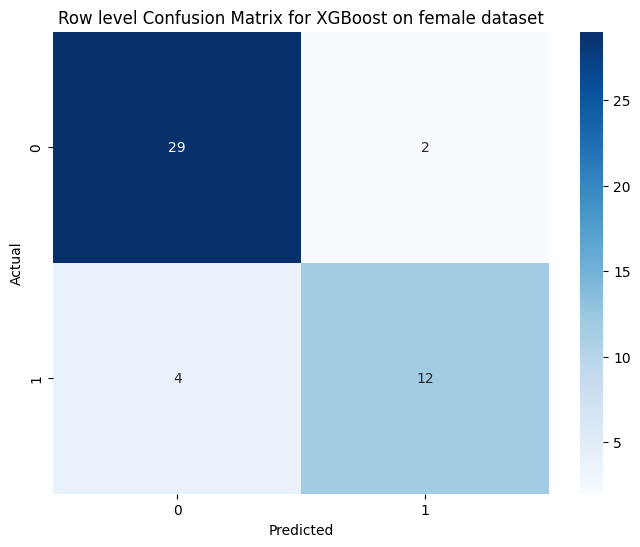

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for dataset_name, dataset_results in all_results.items():
    # sort the models based on accuracy
    accuracy_sorted = sorted(dataset_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
    
    # best performing model
    best_model_name, best_model_results = accuracy_sorted[0]
    
    # confusion matrix
    cm = best_model_results['cm']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"Row level Confusion Matrix for {best_model_name} on {dataset_name} dataset")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## With Cross validation

In [12]:
# prepare both, male, female into dictionary of X and y
datasets = {
    'both': {
        'X': both.drop('label', axis=1),
        'y': both['label']
    },
    'male': {
        'X': male.drop('label', axis=1),
        'y': male['label']
    },
    'female': {
        'X': female.drop('label', axis=1),
        'y': female['label']
    }
}

# update models to dictionary
models = {
    'ZeroR': ZeroRClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Linear SVC': LinearSVC(dual=False, max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=10000),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(force_col_wise=True, verbose=-1),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Gradient Boosting': GradientBoostingClassifier(), 
    'SVM rbf': SVC(kernel='rbf'),
    'SVM linear': SVC(kernel='linear'),
    'Gaussian Process': GaussianProcessClassifier()
}

In [22]:
import scipy.stats as stats
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict

metrics = ['f1', 'accuracy', 'precision', 'recall', 'specificity', 'mcc']
num_folds = 5
all_results = defaultdict(lambda: defaultdict(dict))

for dataset_name, dataset in datasets.items():
    for model_name, model in models.items():
        X, y = dataset['X'], dataset['y']
        cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=5)
        metric_values = []
        start_time = time.time()

        for train_idx, test_idx in cv.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # metric values for current fold
            fold_metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'specificity': recall_score(y_test, y_pred, pos_label=1),
                'mcc': matthews_corrcoef(y_test, y_pred),
                'cm': confusion_matrix(y_test, y_pred)
            }
            metric_values.append(fold_metrics)

        end_time = time.time()
        elapsed_time = end_time - start_time
        all_results[dataset_name][model_name] = {
            'metric_values': metric_values,
            'elapsed_time': elapsed_time
        }


c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zoona\Anacond

In [23]:

# top 3 models for each metric and dataset
for dataset_name, dataset_results in all_results.items():
    print(f"Top 3 models for {dataset_name} dataset:")
    for metric in metrics:
        print(f"\nTop 3 models for {dataset_name} dataset based on {metric}:")
        sorted_models = sorted(dataset_results.items(), key=lambda x: sum(d[metric] for d in x[1]['metric_values']) / num_folds, reverse=True)
        for i, (model_name, model_result) in enumerate(sorted_models[:3]):
            avg_metric = sum(d[metric] for d in model_result['metric_values']) / num_folds
            print(f"{i+1}. {model_name}: {avg_metric}")

    print(f"\nTop 3 fastest models for {dataset_name} dataset (elapsed time):")
    sorted_models = sorted(dataset_results.items(), key=lambda x: x[1]['elapsed_time'])
    for i, (model_name, model_result) in enumerate(sorted_models[:3]):
        print(f"{i+1}. {model_name}: {model_result['elapsed_time']}")

Top 3 models for both dataset:

Top 3 models for both dataset based on f1:
1. QDA: 0.8492751684277431
2. LightGBM: 0.8439944200079863
3. AdaBoost: 0.8432219471349907

Top 3 models for both dataset based on accuracy:
1. QDA: 0.8741110784601822
2. AdaBoost: 0.8690567146635322
3. LightGBM: 0.8690273288275053

Top 3 models for both dataset based on precision:
1. AdaBoost: 0.8673723927234365
2. QDA: 0.8598548166195226
3. Gradient Boosting: 0.8584623204120356

Top 3 models for both dataset based on recall:
1. QDA: 0.8400000000000001
2. LightGBM: 0.8342857142857143
3. XGBoost: 0.8285714285714285

Top 3 models for both dataset based on specificity:
1. QDA: 0.8400000000000001
2. LightGBM: 0.8342857142857143
3. XGBoost: 0.8285714285714285

Top 3 models for both dataset based on mcc:
1. QDA: 0.742052357397068
2. AdaBoost: 0.7332520448622258
3. LightGBM: 0.7331709112718955

Top 3 fastest models for both dataset (elapsed time):
1. QDA: 0.03255200386047363
2. Naive Bayes: 0.03475522994995117
3. Deci

In [25]:
# print dataset_results values
print(all_results['both']['Random Forest'].values())

dict_values([[{'accuracy': 0.8795180722891566, 'precision': 0.8378378378378378, 'recall': 0.8857142857142857, 'f1': 0.8611111111111112, 'specificity': 0.8857142857142857, 'mcc': 0.7557818098050726, 'cm': array([[42,  6],
       [ 4, 31]], dtype=int64)}, {'accuracy': 0.8795180722891566, 'precision': 0.8378378378378378, 'recall': 0.8857142857142857, 'f1': 0.8611111111111112, 'specificity': 0.8857142857142857, 'mcc': 0.7557818098050726, 'cm': array([[42,  6],
       [ 4, 31]], dtype=int64)}, {'accuracy': 0.8795180722891566, 'precision': 0.9032258064516129, 'recall': 0.8, 'f1': 0.8484848484848485, 'specificity': 0.8, 'mcc': 0.7528945385007241, 'cm': array([[45,  3],
       [ 7, 28]], dtype=int64)}, {'accuracy': 0.7317073170731707, 'precision': 0.696969696969697, 'recall': 0.6571428571428571, 'f1': 0.6764705882352942, 'specificity': 0.6571428571428571, 'mcc': 0.44820780590877507, 'cm': array([[37, 10],
       [12, 23]], dtype=int64)}, {'accuracy': 0.8170731707317073, 'precision': 0.75, 'rec

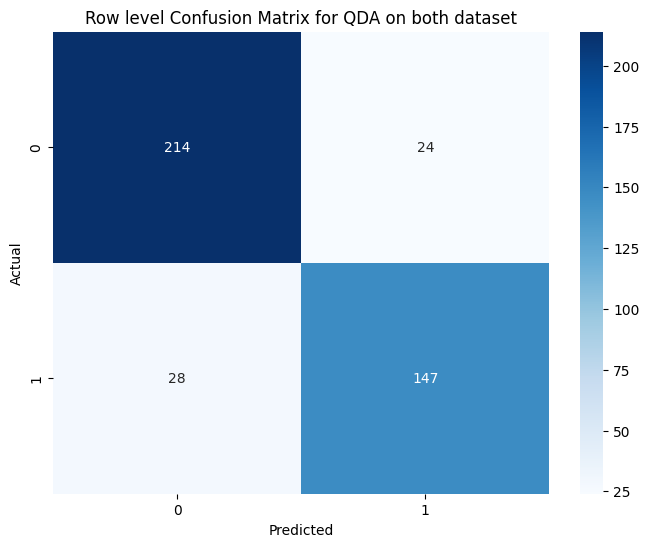

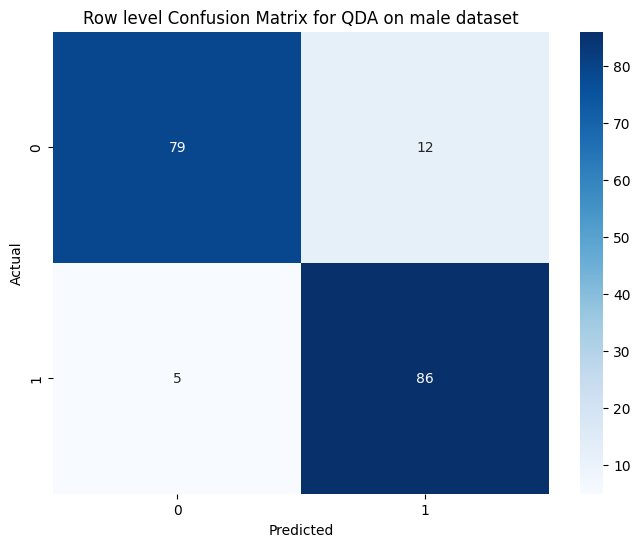

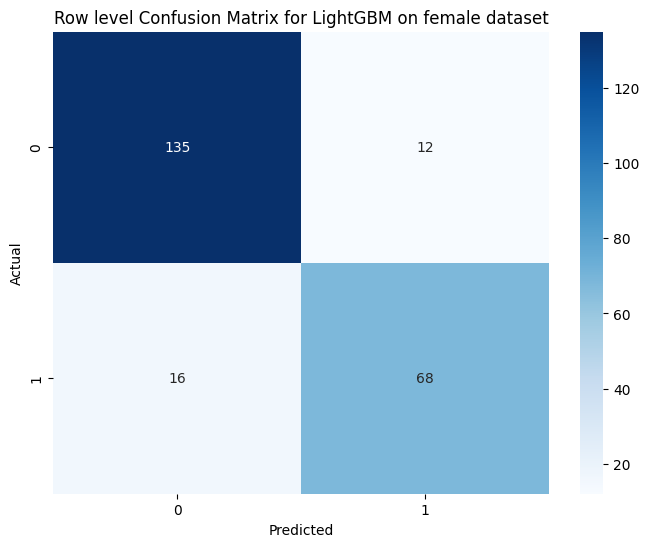

In [28]:
from sklearn.metrics import confusion_matrix

for dataset_name, dataset_results in all_results.items():
    # sort the models based on accuracy
    accuracy_sorted = sorted(dataset_results.items(), key=lambda x: sum(d['accuracy'] for d in x[1]['metric_values']) / len(x[1]['metric_values']), reverse=True)
    
    # best performing model
    best_model_name, best_model_results = accuracy_sorted[0]
    
    # confusion matrix
    cm = sum(d['cm'] for d in best_model_results['metric_values'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"Row level Confusion Matrix for {best_model_name} on {dataset_name} dataset")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Feature Importance

In [ ]:

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
# fit and evaluate models
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfs = [female, male, both]
df_names = ['female', 'male', 'both']

features_names = ['mean', 'std', '%zero', 'activeNight', 'inactiveDay', 'activeDark', 'inactiveLight']

# fit and evaluate models
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    """ Fits and evaluates multiple machine learning models on the given training and testing data. 
    Parameters:
    - X_train (array-like): The training input samples.
    - y_train (array-like): The target values for the training input samples.
    - X_test (array-like): The testing input samples.
    - y_test (array-like): The target values for the testing input samples.
    
    Returns:
    - accuracy (float): The accuracy score of the random forest model on the testing data.
    - f1 (float): The F1 score of the random forest model on the testing data.
    - conf_matrix (array-like): The confusion matrix of the random forest model on the testing data.
    - recall (float): The recall score of the random forest model on the testing data.
    - mcc (float): The Matthews correlation coefficient of the random forest model on the testing data.
    - precision (float): The precision score of the random forest model on the testing data.
    - roc_auc (float): The ROC AUC score of the random forest model on the testing data.
    - specificity (float): The specificity score of the random forest model on the testing data.
    - support (int): The support of the positive class in the testing data.
    - feature_importance_dict (dict): A dictionary containing various feature importance metrics.
    """
    # Random Forest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Decision Tree model
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)

   # Get feature importances
    rf_feature_importances = dict(zip(features_names, rf_model.feature_importances_))
    dt_feature_importances = dict(zip(features_names, dt_model.feature_importances_))

    permutation_result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=5)
    permutation_importances = dict(zip(features_names, permutation_result.importances_mean))

    vif_data = pd.DataFrame()
    vif_data["feature"] = features_names
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]


    # evaluate the model
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    specificity = report['0']['recall']
    support = report['1']['support']

    # dictionary with all feature importance metrics
    feature_importance_dict = {
        "RandomForest": rf_feature_importances,
        "DecisionTree": dt_feature_importances,
        "PermutationImportance": permutation_importances,
        "VIF": vif_data.set_index("feature")["VIF"].to_dict()
    }

    return accuracy, f1, conf_matrix, recall, mcc, precision, roc_auc, specificity, support, feature_importance_dict

In [ ]:
# create dictionary to store feature importances
feature_importances = {}
# loop through datasets, fit models
for df, df_names in zip(dfs, df_names):
    X_train, y_train, X_test, y_test = split_data_active(df, random_state=5, deleteXy=True)
    # convert numpy arrays to pandas DataFrame and Series
    X_train = pd.DataFrame(X_train)
    y_train = pd.Series(y_train)
    X_test = pd.DataFrame(X_test)
    y_test = pd.Series(y_test)
    print(f'Fitting model for {df_names} dataset')
    accuracy, f1, conf_matrix, recall, mcc, precision, roc_auc, specificity, support, feature_importance_dict = fit_and_evaluate(X_train, y_train, X_test, y_test)
    feature_importances[df_names] = feature_importance_dict


Fitting model for female dataset
Fitting model for male dataset
Fitting model for both dataset


In [ ]:
print(feature_importance_dict.values())

dict_values([{'mean': 0.15752372774263443, 'std': 0.1319579693635674, '%zero': 0.1339501016087749, 'activeNight': 0.10217307548004516, 'inactiveDay': 0.07484533539002887, 'activeDark': 0.1750621826483288, 'inactiveLight': 0.2244876077666205}, {'mean': 0.032661369278428415, 'std': 0.20958365651567357, '%zero': 0.08422715269730859, 'activeNight': 0.1249174128297002, 'inactiveDay': 0.11562208852328147, 'activeDark': 0.1407448250815652, 'inactiveLight': 0.2922434950740427}, {'mean': -0.036144578313252976, 'std': 3.3306690738754695e-17, '%zero': 0.02771084337349402, 'activeNight': 0.02891566265060245, 'inactiveDay': -0.02048192771084333, 'activeDark': 0.03493975903614462, 'inactiveLight': 0.11686746987951813}, {'mean': 52.23044990400703, 'std': 59.33867123616332, '%zero': 7.294517655063021, 'activeNight': 121.0131989669583, 'inactiveDay': 10.591374510652157, 'activeDark': 118.12754689088011, 'inactiveLight': 10.685313871731422}])


In [ ]:
# plot feature importances



def plot_feature_importances(df_name, metric, feature_importance_dict):
    """
    Plots the feature importances for a given metric.

    Args:
        df_name (str): The name of the DataFrame.
        metric (str): The metric for which feature importances are calculated.
        feature_importance_dict (dict): A dictionary containing feature importances for different metrics.

    Returns:
        None
    """
    importances = feature_importance_dict[metric]
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
    feature_names = [feature for feature, importance in sorted_importances]
    importance_values = [importance for feature, importance in sorted_importances]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(range(len(feature_names)), importance_values, align='center')
    ax.set_yticks(range(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_xlabel(f'{metric} Feature Importance')
    ax.set_title(f'{df_name} - {metric} Feature Importances')
    plt.tight_layout()
    plt.show()

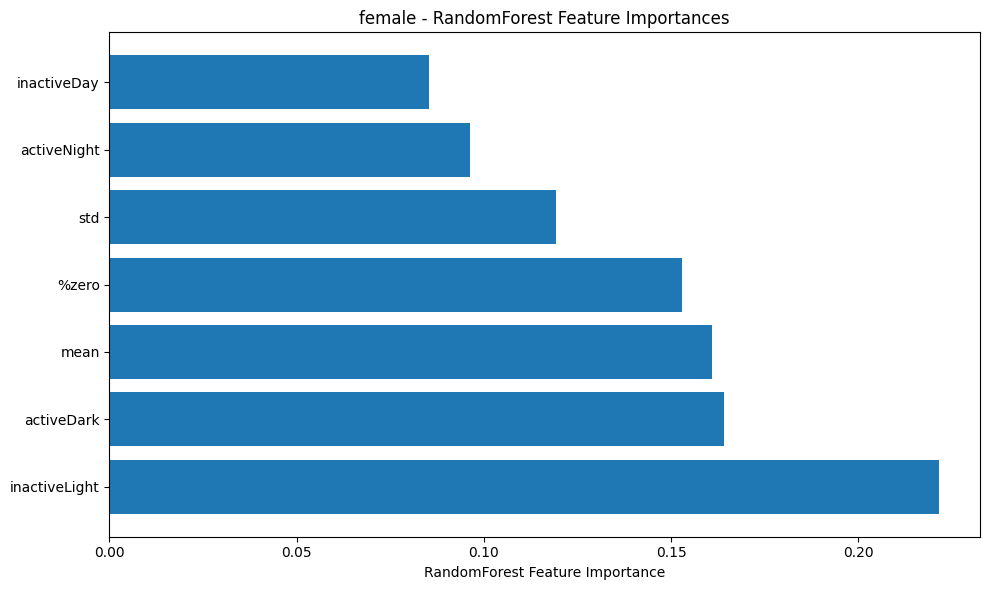

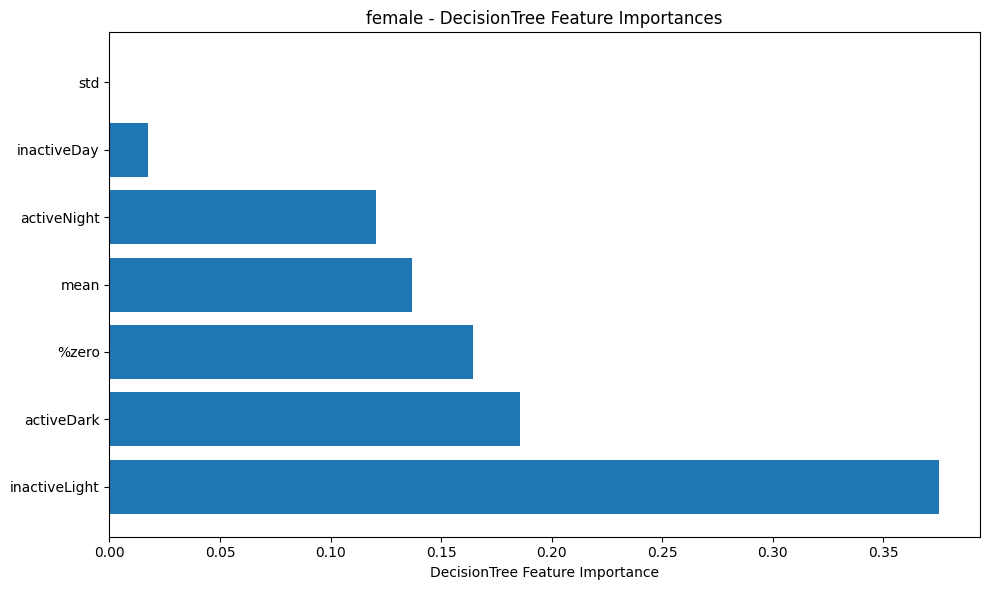

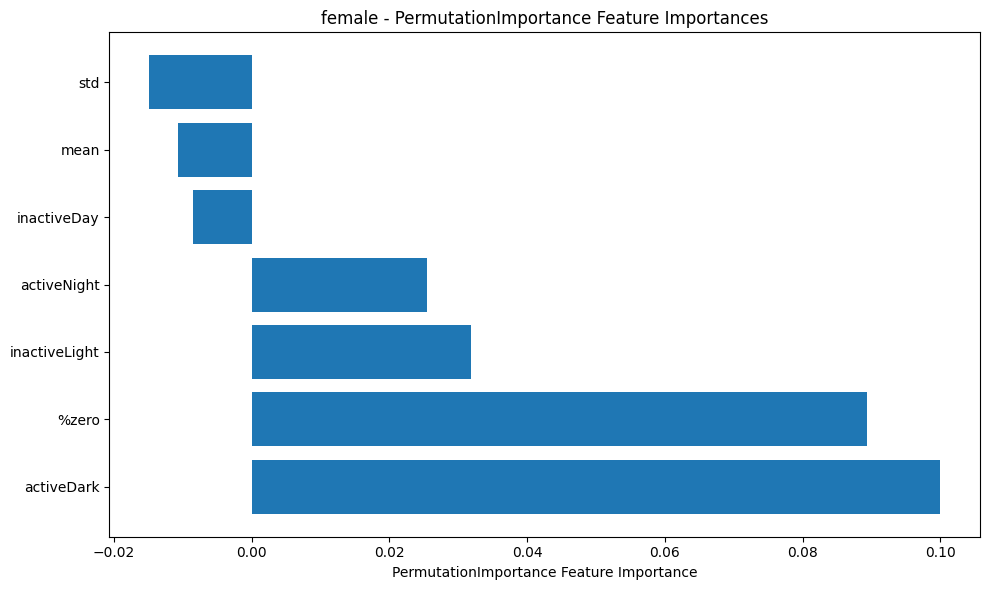

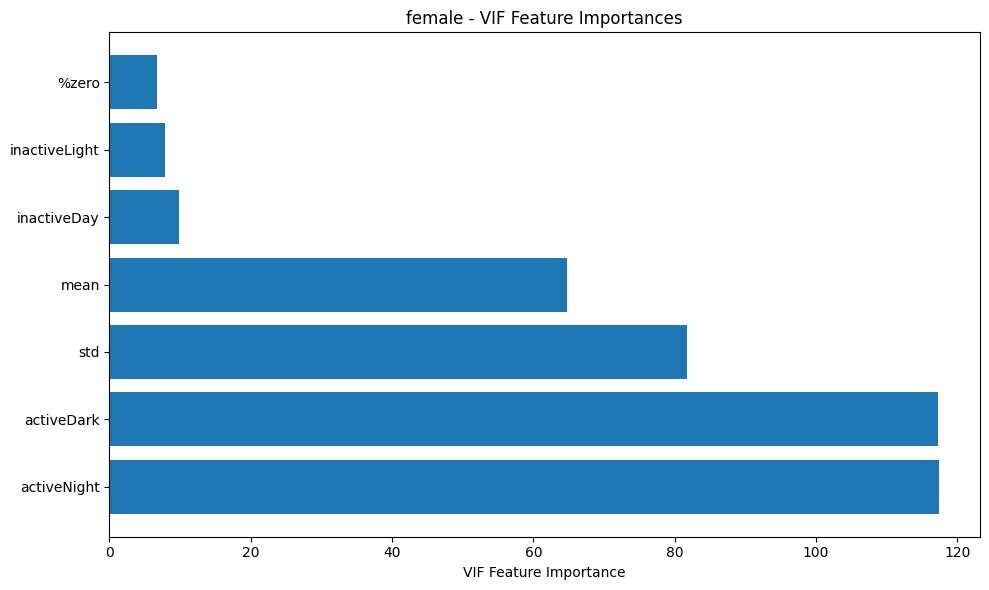

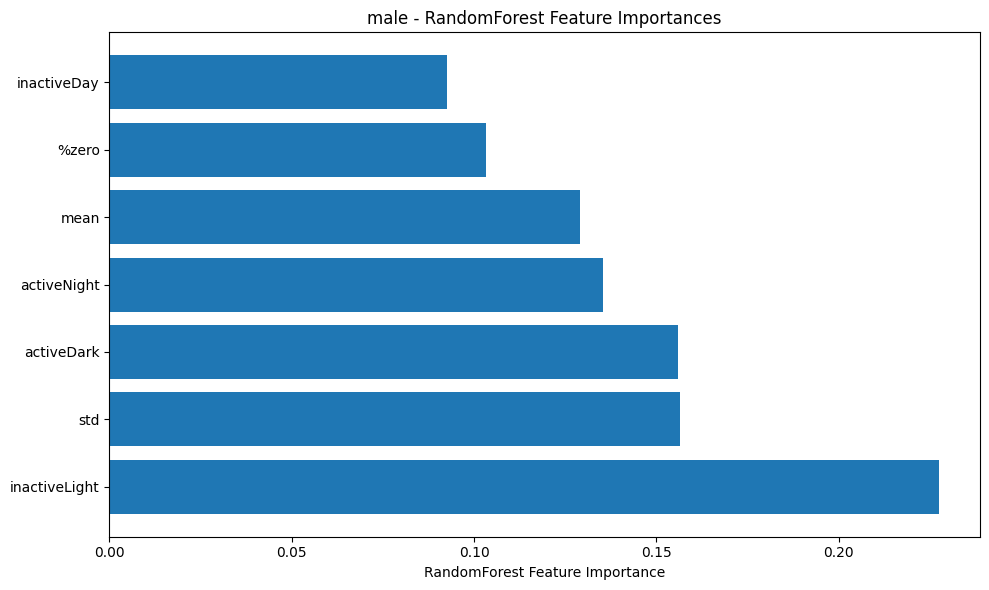

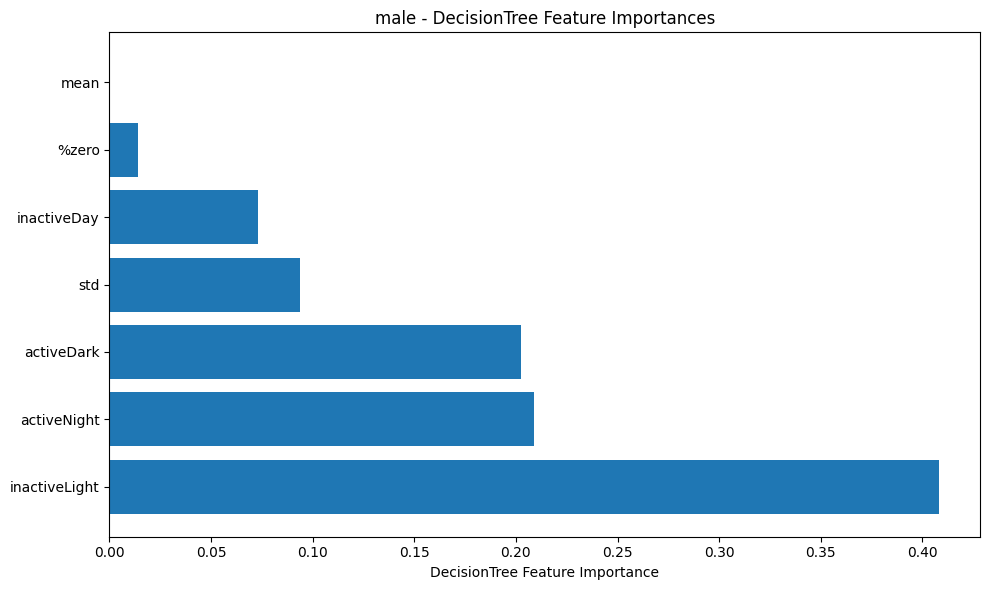

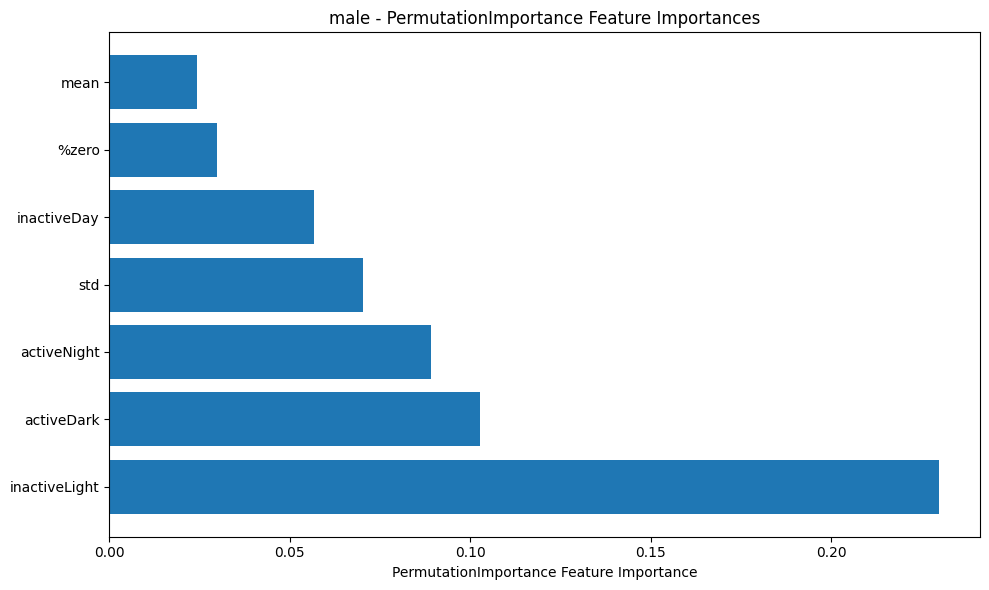

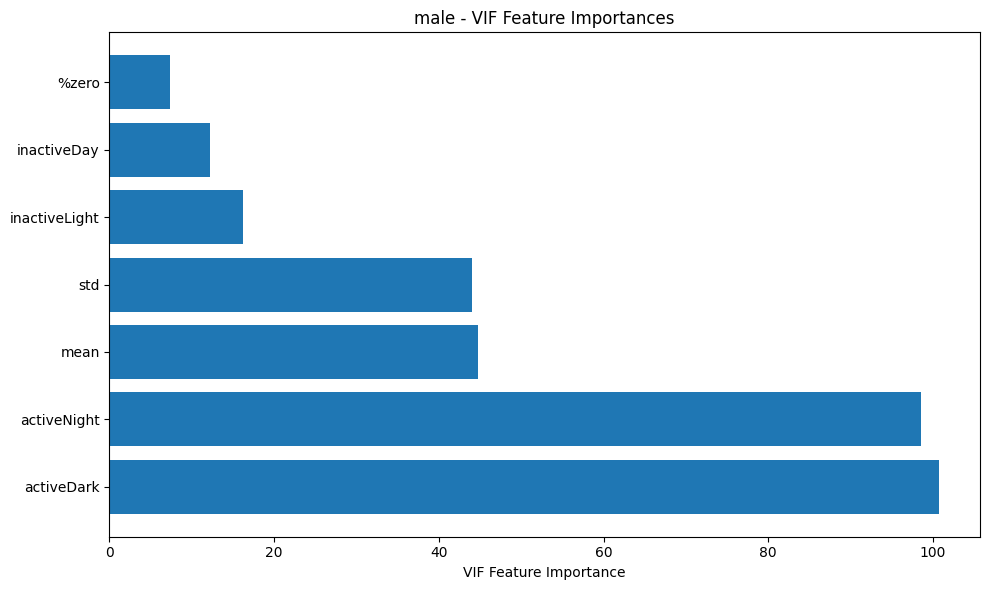

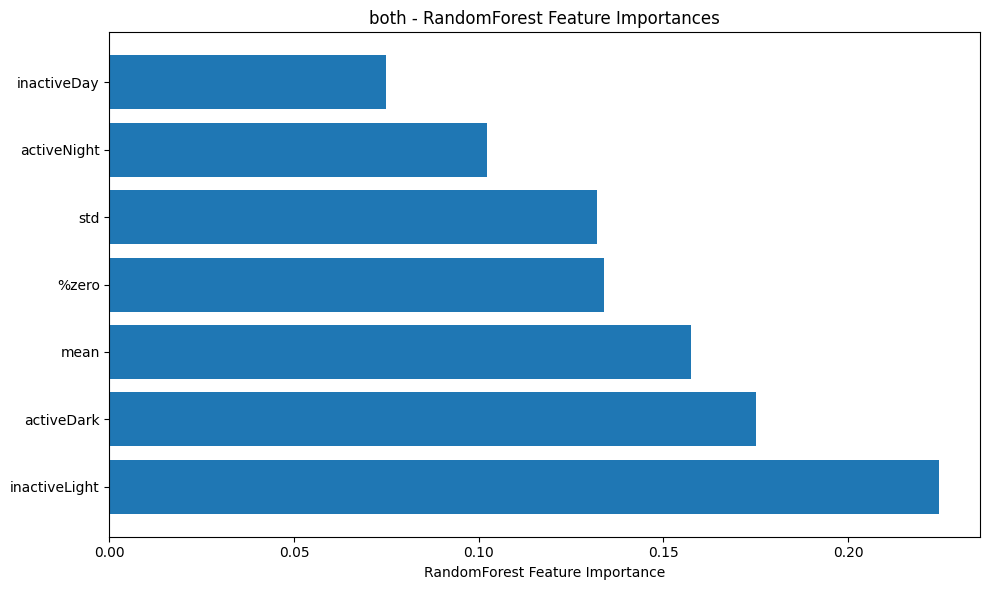

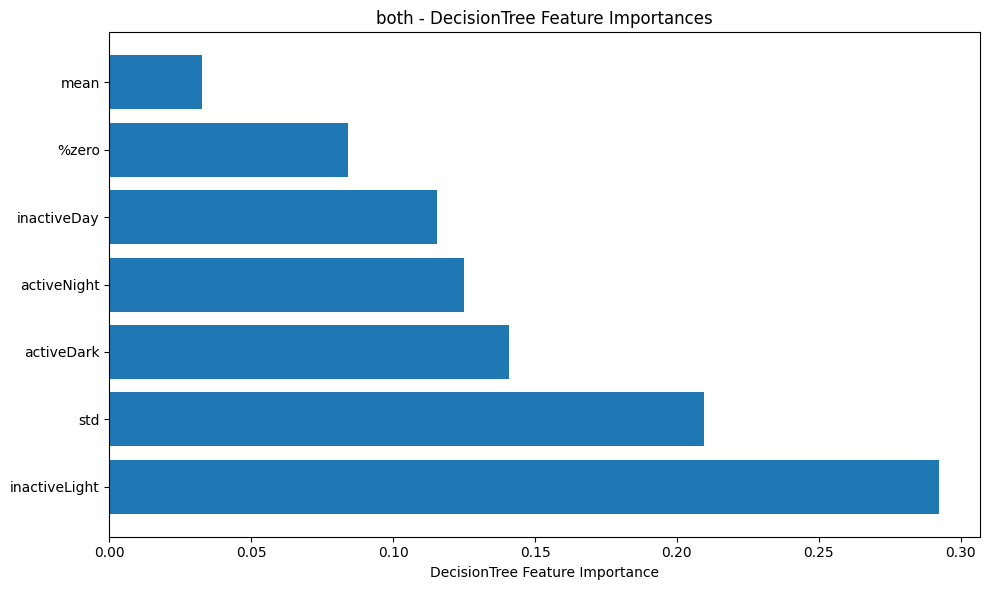

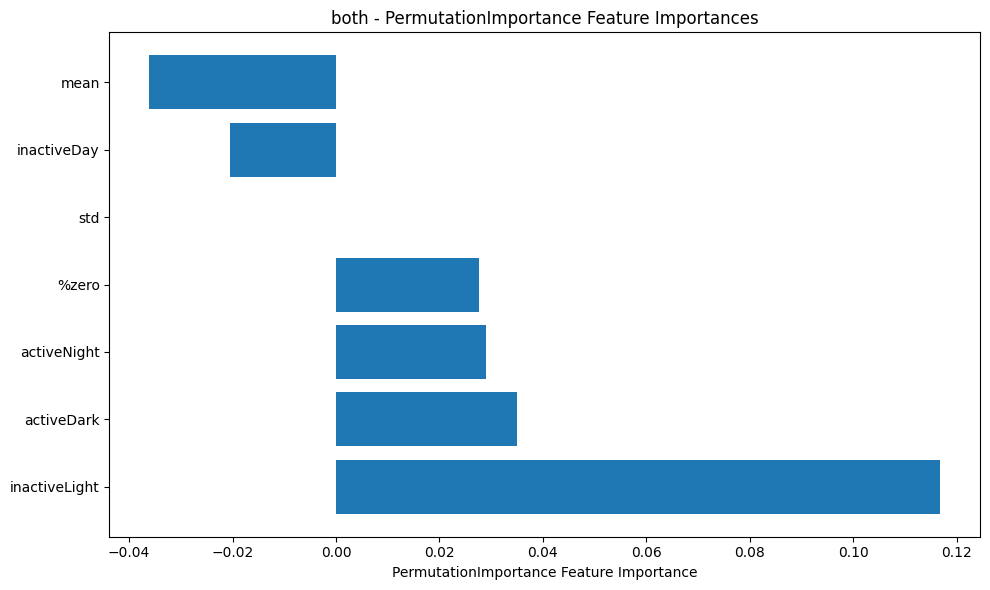

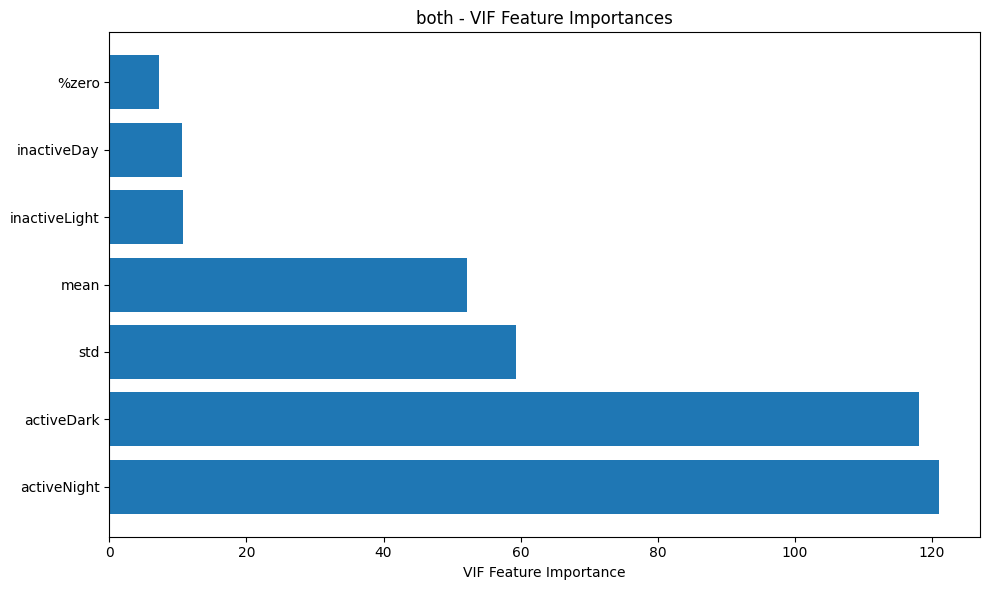

In [ ]:
# feature importance metrics for each dataset
for df_name, importance_dict in feature_importances.items():
    for metric in ['RandomForest', 'DecisionTree', 'PermutationImportance', 'VIF']:
        plot_feature_importances(df_name, metric, importance_dict)